In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("Data_Train (2).xlsx")

# Getting Information about dataset #

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# Preprocessing data #

**dropping null value**

In [11]:
data.dropna(axis = 0, inplace = True)

**change object datatype to datetime datatype**

In [13]:
def change_date_time(col):
    data[col] = pd.to_datetime(data[col])

In [14]:
for i in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_date_time(i)

C:\Users\hakur\AppData\Local\Temp\ipykernel_28216\1518183034.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])
C:\Users\hakur\AppData\Local\Temp\ipykernel_28216\1518183034.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\hakur\AppData\Local\Temp\ipykernel_28216\1518183034.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


**Adding new date time features**

In [16]:
data['day_of_journey'] = data['Date_of_Journey'].dt.day
data["month of journey"] = data["Date_of_Journey"].dt.month
data["year of journey"] = data["Date_of_Journey"].dt.year
data["hour of dep"] = data["Dep_Time"].dt.hour
data["minute of dep"] = data["Dep_Time"].dt.minute
data["hour of arrival"] = data["Arrival_Time"].dt.hour
data["minute of arrival"] = data["Arrival_Time"].dt.minute

**dropping previous columns**

In [18]:
drop_col = ["Date_of_Journey","Dep_Time","Arrival_Time"]
data.drop(drop_col, axis = 1,inplace = True)

**Preprocessing duration feature**

In [20]:
def duration(x):
    if x.isdigit():
        # Assume it's minutes and add "0h" and "0m" accordingly
        x = '0h ' + x + 'm'
    elif 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [21]:
data["Duration"] = data["Duration"].apply(duration)


In [22]:
data["Duration_hour"]= data["Duration"].apply(lambda x: int(x.split(" ")[0][0:-1]))
data["Duration_min"] = data["Duration"].apply(lambda x: int(x.split(" ")[1][0:-1]))

## Visualization

**bar graph**

Text(0, 0.5, 'boarding flight')

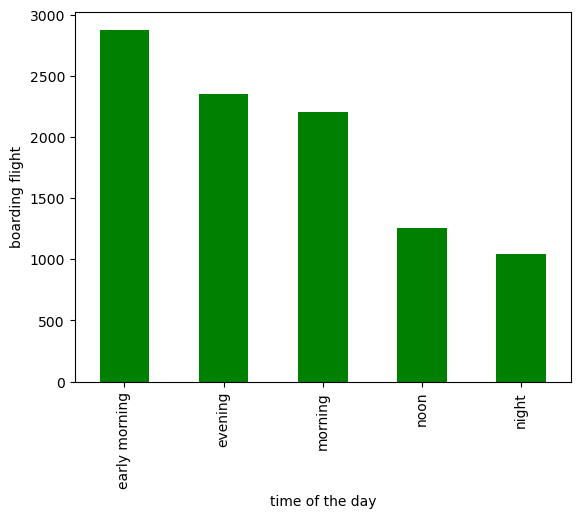

In [25]:
#getting the number of flight at particular time of day
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "early morning"
    elif (x>8) and (x<=12):
        return "morning"
    elif(x>12) and (x<16):
        return "noon"
    elif (x>16) and (x<=20):
        return "evening"
    elif (x>20) and (x<=24):
        return "night"
    else:
        "late night"
data["hour of dep"].apply(flight_dep_time).value_counts().plot(kind="bar", color="green")
plt.xlabel("time of the day")
plt.ylabel("boarding flight")

**scatter plot**

<Axes: xlabel='Duration_hour', ylabel='Price'>

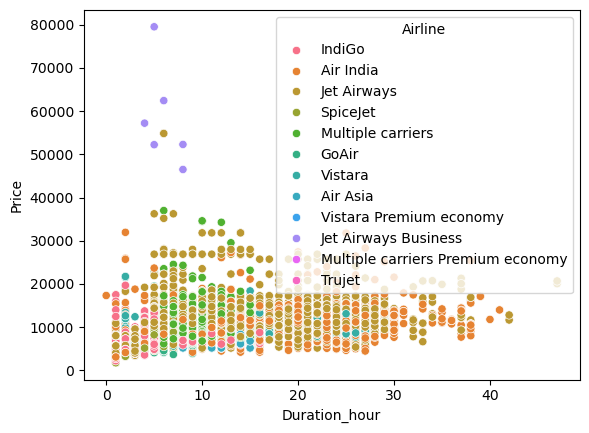

In [27]:
sns.scatterplot(x = "Duration_hour" , y = "Price", hue = "Airline", data=data )

**boxplot**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

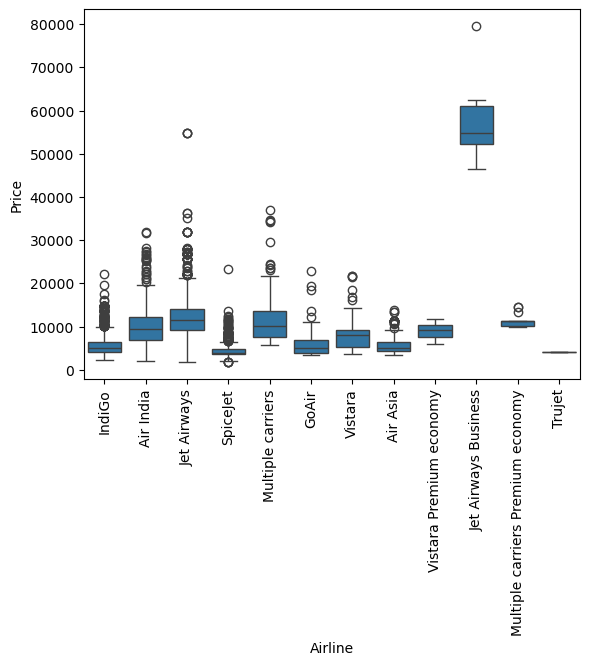

In [29]:
sns.boxplot(x = "Airline", y = "Price",data= data)
plt.xticks(rotation="vertical")

## Encoding ##

**encoding source column**

In [32]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [33]:
sor = data.groupby(["Source"])["Price"].mean().sort_values().index
sor

Index(['Chennai', 'Mumbai', 'Banglore', 'Kolkata', 'Delhi'], dtype='object', name='Source')

In [34]:
dic_sor = {key:index for index,key in enumerate(sor)}
data["Source"] = data["Source"].map(dic_sor)

In [35]:
data["Source"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Source, Length: 10682, dtype: int64

**encoding destination column**

In [37]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [38]:
data["Destination"].replace("New Delhi","Delhi", inplace = True)

C:\Users\hakur\AppData\Local\Temp\ipykernel_28216\3680914494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Destination"].replace("New Delhi","Delhi", inplace = True)


In [39]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values().index
dict_dest = {key:index for index,key in enumerate(dest)}
data["Destination"] = data["Destination"].map(dict_dest)

In [40]:
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [41]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month of journey',
       'year of journey', 'hour of dep', 'minute of dep', 'hour of arrival',
       'minute of arrival', 'Duration_hour', 'Duration_min'],
      dtype='object')

**encoding airline column**

In [43]:
airline = data.groupby(["Airline"])["Price"].mean().sort_values().index

In [44]:
air_dict = {key:index for index, key in enumerate(airline)}
data["Airline"]= data["Airline"].map(air_dict)

**encoding total stops column**

In [46]:
stop = {'2 stops':2, 'non-stop':0, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [47]:
cat_data = [col for col in data.columns if data[col].dtype=="object"]
num_data = [col for col in data.columns if data[col].dtype!="object"]

In [48]:
col_drop = ["Duration","Additional_Info","Route"]
data.drop(col_drop, axis =1 , inplace = True)

In [49]:
data

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month of journey,year of journey,hour of dep,minute of dep,hour of arrival,minute of arrival,Duration_hour,Duration_min
0,3,2,2,0,3897,24,3,2019,22,20,1,10,2,50
1,7,3,3,2,7662,1,5,2019,5,50,13,15,7,25
2,10,4,4,2,13882,9,6,2019,9,25,4,25,19,0
3,3,3,3,1,6218,12,5,2019,18,5,23,30,5,25
4,3,2,2,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,3,0,4107,9,4,2019,19,55,22,25,2,30
10679,7,3,3,0,4145,27,4,2019,20,45,23,20,2,35
10680,10,2,2,0,7229,27,4,2019,8,20,11,20,3,0
10681,5,2,2,0,12648,1,3,2019,11,30,14,10,2,40


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline            10682 non-null  int64
 1   Source             10682 non-null  int64
 2   Destination        10682 non-null  int64
 3   Total_Stops        10682 non-null  int64
 4   Price              10682 non-null  int64
 5   day_of_journey     10682 non-null  int32
 6   month of journey   10682 non-null  int32
 7   year of journey    10682 non-null  int32
 8   hour of dep        10682 non-null  int32
 9   minute of dep      10682 non-null  int32
 10  hour of arrival    10682 non-null  int32
 11  minute of arrival  10682 non-null  int32
 12  Duration_hour      10682 non-null  int64
 13  Duration_min       10682 non-null  int64
dtypes: int32(7), int64(7)
memory usage: 959.7 KB


## Define Features and Target

In [52]:
X = data.drop(["Price"],axis=1)
Y= data["Price"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Select and Train the Model

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)
rf_model=RandomForestRegressor()
rf_model.fit(X_train,Y_train)
    

RandomForestRegressor()

In [56]:
Y_pred = rf_model.predict(X_test)

## Evaluate the Model

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.linear_model import LinearRegression

In [59]:
r2  = r2_score(Y_test,Y_pred)
absolute_error  = mean_absolute_error(Y_test,Y_pred)
squared_error = mean_squared_error(Y_test,Y_pred)
print("r2:",r2,"mean_absolute_error:",absolute_error,"mean_squared_error:",squared_error,end="\n")

r2: 0.8022196319970604 mean_absolute_error: 1185.0108677639757 mean_squared_error: 4264551.43469283


training score:  0.9534248671966374
prediction: [16825.86        5556.95        8824.46       ...  6518.22
 12834.925      13021.34383333]


r2:  0.8012114143578004
absolute_error:  4286290.680217566
squared_error:  4286290.680217566


C:\Users\hakur\AppData\Local\Temp\ipykernel_28216\2439636225.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-Y_pred)


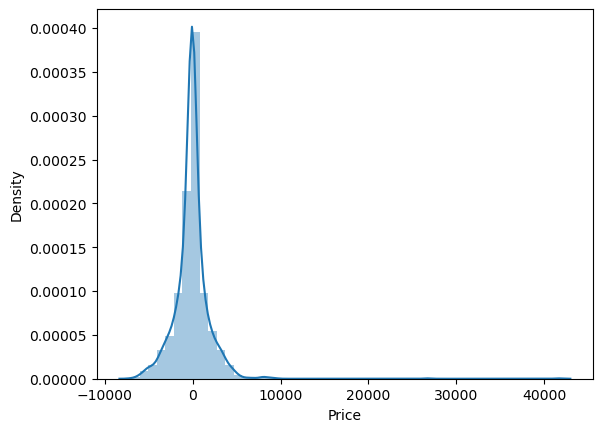

In [60]:
from sklearn import metrics
def predict(model):
    ml_model=model.fit(X_train,Y_train)
    print("training score: ",ml_model.score(X_train,Y_train))
    Y_pred = ml_model.predict(X_test)
    print("prediction: {}".format(Y_pred))
    print("\n")
    print("r2: ",metrics.r2_score(Y_test,Y_pred))
    print("absolute_error: ",metrics.mean_squared_error(Y_test,Y_pred))
    print("squared_error: ",metrics.mean_squared_error(Y_test,Y_pred))
    sns.distplot(Y_test-Y_pred)
predict(RandomForestRegressor())
    

## Save the Model

In [61]:
import pickle

In [63]:
rf_file = open("flight_price_model.pkl","wb")
dump = pickle.dump(rf_model,rf_file)

## load the model

In [121]:
rf_file = open("flight_price_model.pkl","rb")
loaded_model = pickle.load(rf_file)


## Prediction on New Data

In [ ]:
import pandas as pd

# Example new data (replace with actual new data)
new_data.rename(columns={
    "Airline": [2],  # Encoded airline value
    "Source": [1],  # One-hot encoded source
    "Destination": [3],  # Encoded destination value
    "Total_Stops": [1],  # 1 stop
    "day_of_journey": [25],  # 25th day of the month
    "month of journey": [12],
    "year of journey": [2023],  # 2023
    "hour of dep": [9],  # Departure time: 9 AM
    "minute of dep": [15],  # Departure time: 9:15 AM
    "hour of arrival": [13],  # Arrival time: 1 PM
    "minute of arrival": [45],  # Arrival time: 1:45 PM
    "Duration_hour": [4],  # Duration: 4 hours
    "Duratiom_mins": [30],  # Duration: 30 minutes
},inplace=True)

print("New data prepared for prediction:")
print(new_data)


In [169]:
new_prediction = loaded_model.predict(new_data)
print("Predicted Prices:", new_prediction)

Predicted Prices: [4593.17666667]


C:\Users\hakur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
